In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("housing.csv")
data.dropna(inplace = True)

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [4]:
# Dimensionality - Shape or size of data
print("Size (Number of elements(Columns x rows) = {}".format(data.size))
print("Shape (Tuple representation of the Dataframe's dimensionality) = {}".format(data.shape))
print("ndim (int representing the number of axes/array dimensions) = {}".format(data.ndim))

Size (Number of elements(Columns x rows) = 204330
Shape (Tuple representation of the Dataframe's dimensionality) = (20433, 10)
ndim (int representing the number of axes/array dimensions) = 2


In [5]:
# Define Features(X) and lables (y) #This is a DataFrame. A 2D array
X = data.drop(['median_house_value','ocean_proximity'], axis = 1) # OR X = data.iloc[:,:-2]
print("Shape of X = {}".format(X.shape))

Shape of X = (20433, 8)


In [6]:
y = data['median_house_value'] # This is a series(Single dimension array. Normal array)
print("Shape of y = {}".format(y.shape)) 

Shape of y = (20433,)


In [7]:
# Split training data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,259900.0
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,70500.0
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,117800.0
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,185400.0
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,94200.0
...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,226800.0
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,52500.0
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,130400.0
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,165300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

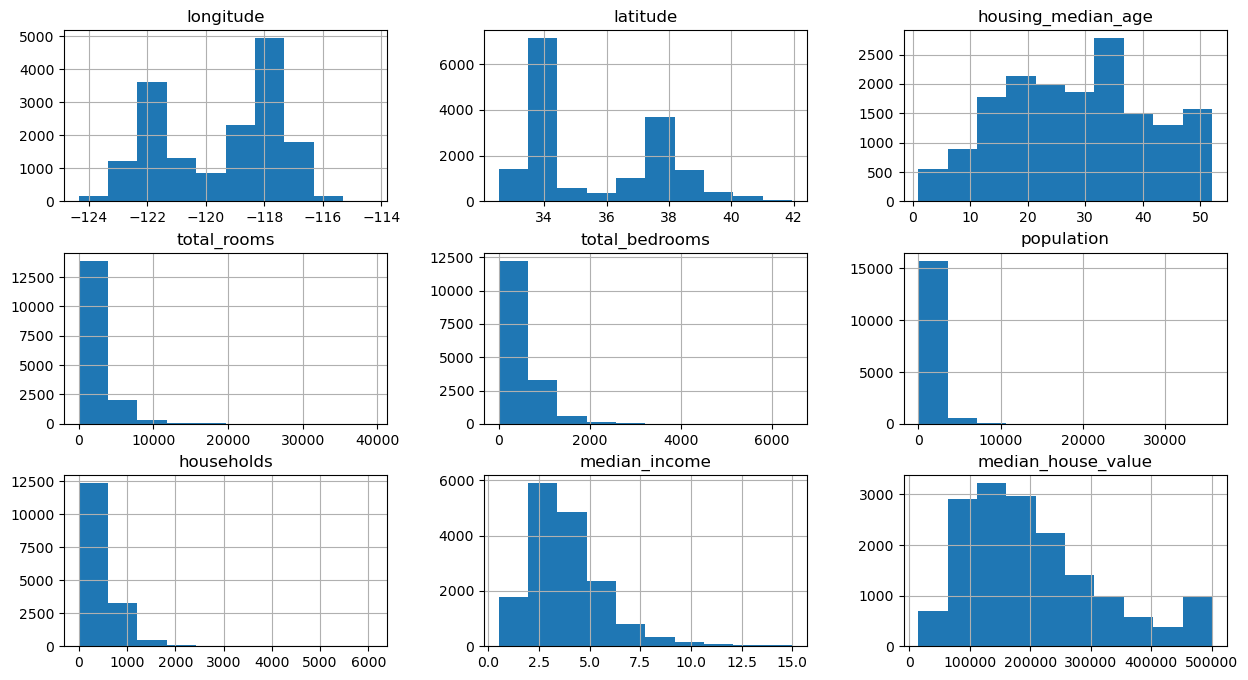

In [9]:
train_data.hist(figsize = (15,8))

In [10]:
# Build the correlation matrix
corr_matrix = train_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687664
total_rooms           0.134835
housing_median_age    0.107539
households            0.067404
total_bedrooms        0.051644
population           -0.023004
longitude            -0.046276
latitude             -0.144174
Name: median_house_value, dtype: float64

<Axes: >

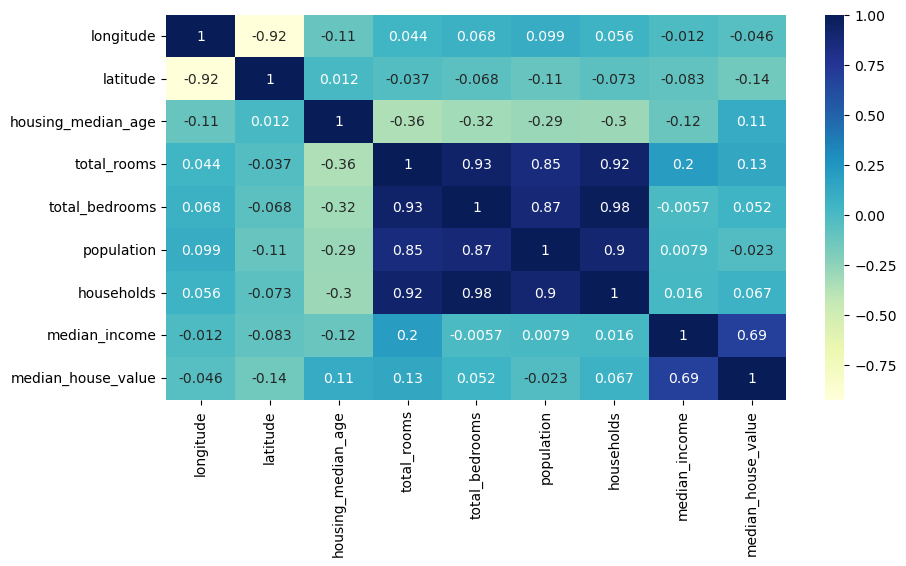

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, annot=True, cmap ="YlGnBu")

In [12]:
# Fitting Multiple Linear Regression To the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([183808.13184992, 162083.6102927 , 115743.9884321 , ...,
       144049.04773802, 222051.78956701, 251044.74554985])

In [14]:
# Calculating the coefficients
regressor.coef_

array([-4.31984707e+04, -4.27153269e+04,  1.16938962e+03, -8.05197604e+00,
        1.15106790e+02, -3.60784708e+01,  3.91190939e+01,  4.01558281e+04])

In [15]:
# Calculating the Intercept
regressor.intercept_

-3634118.158843359

In [16]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6414568274158077